### An Analytic Report and Research Proposal on a dataset of your choosing

#### Introduction

The data set chosen for this captone is the FEMA Dataset. FEMA stands for Federal Emergency Management Agency. The agency's primary purpose is to coordinate the response to a disaster that has occurred in the United States and that overwhelms the resources of local and state authorities. The governor of the state in which the disaster occurs must declare a state of emergency and formally request from the president that FEMA and the federal government respond to the disaster

The president can declare an emergency for any occasion or instance when the President determines federal assistance is needed. Emergency declarations supplement State and local or Indian tribal government efforts in providing emergency services, such as the protection of lives, property, public health, and safety, or to lessen or avert the threat of a catastrophe in any part of the United States. The total amount of assistance provided for in a single emergency may not exceed $5 million.

The president can declare 

A major disaster declaration provides a wide range of federal assistance programs for individuals and public infrastructure, including funds for both emergency and permanent work.

The dataset can be found here: https://www.kaggle.com/fema/federal-disasters/

This dataset include a record for every federal emergency or disaster declared by the President of the United States since 1953.

* Why is this dataset interesting or significant?

This is a robust dataset and is very interesting because although we hear about disaster and state of emergencies, not too many people understand the extent of it. A major disaster for any natural event, including any hurricane, tornado, storm, high water, wind-driven water, tidal wave, tsunami, earthquake, volcanic eruption, landslide, mudslide, snowstorm, or drought, or, regardless of cause, fire, flood, or explosion, that the President determines has caused damage of such severity that it is beyond the combined capabilities of state and local governments to respond.

I live in FL and we battle hurricane every year as the natural disaster. So, this is significant to me to see the trend of this natural disaster and more importantly, how has it changed since 1953.



In [41]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
from datetime import date
%matplotlib inline


In [2]:
# Making sure that the data is there and it looks good to do some analysis

data = pd.read_csv('datasets/FEMA-database.csv')
data.head(5)

#### Other commands I used to look more into the data
#data.info()
#data.dtypes
# what size data are we looking at
#print(data.shape)


,Declaration_Number,Declaration_Type,Declaration_Date,State,County,Disaster_Type,Disaster_Title,Start_Date,End_Date,Close_Date,Individual_Assistance_Program,Individuals_Households_Program,Public_Assistance_Program,Hazard_Mitigation_Program
0,DR-1,Disaster,05/02/1953,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,Yes,No,Yes,Yes
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,Yes,No,Yes,Yes
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,Yes,No,Yes,Yes
3,DR-4,Disaster,06/02/1953,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,Yes,No,Yes,Yes
4,DR-5,Disaster,06/06/1953,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,Yes,No,Yes,Yes


Looking at the data, one of the things I noticed is that the date field is not actual DATE field and if I want to see how long an emergency declartion stays open and such, I would need to change the format to date format and calculate the days from there. So, lets change those to DATE format.

In [3]:
# changing to date format
data['End_Date'] = pd.to_datetime(data['End_Date'])
data['Start_Date'] = pd.to_datetime(data['Start_Date'])
data['Declaration_Date'] = pd.to_datetime(data['Declaration_Date'])
data['Close_Date'] = pd.to_datetime(data['Close_Date'])


#### 1) Question
* What type of emergencies are declared by FEMA?  
    * While looking at this question, other questions came up 
        * What are the different declarations types means and how do we define them?

### Some Initial Summary Statistics

Now lets try some initial startistics and try to answer some basic questions. I would also like to provide some visualizations so we can understand the data better.

Here are some basic questions and statistics to look at

* What type of emergencies are declared by FEMA?  
    * While looking at this question, other questions came up 
        * What are the different declarations types means and how do we define them?

* What are the different types of disasters that have been cateloged by FEMA?
    * What is the top 5 types of disasters caused since 1953
    * What is the least 5 types of disasters caused since 1953
 
* Which state by far has the most disaster? Which state has the least?


Text(0, 0.5, 'Total Count of Declarations')

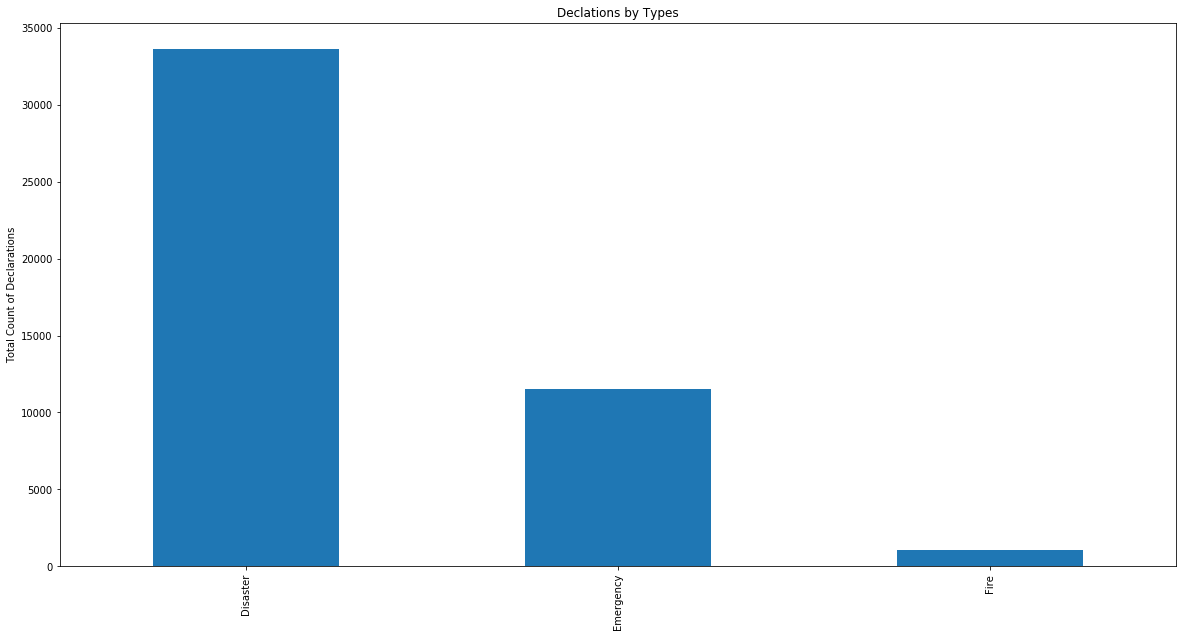

In [42]:
# This is achieved by looking at the emergency declaration types column.

data.Declaration_Type.value_counts().plot(kind='bar', figsize=(20, 10))

plt.title('Declations by Types')
plt.ylabel('Total Count of Declarations')


So the question here was what type of declarations do FEMA handle. It looks like from the data, Emergency declarations are categorized into Disaster, Emergency and Fire. Interesting to see that FIRE by itself is a declaration type. Would also be interested to see what "Emergency" constitutes and what are "disasters".

It also looks like since 1953, most declaration types have been disaster category. There is less FEMA Emergency declartion with FIRE.

In [5]:
# what constitutes disaster, emergency and fire. Are there overlaps?

disaster_df = data[data['Declaration_Type'] == 'Disaster']
emergency_df = data[data['Declaration_Type'] == 'Emergency']
fire_df = data[data['Declaration_Type'] == 'Fire']

#disaster_df
#emergency_df
#fire_df

Text(0, 0.5, 'Total Count of Disasters')

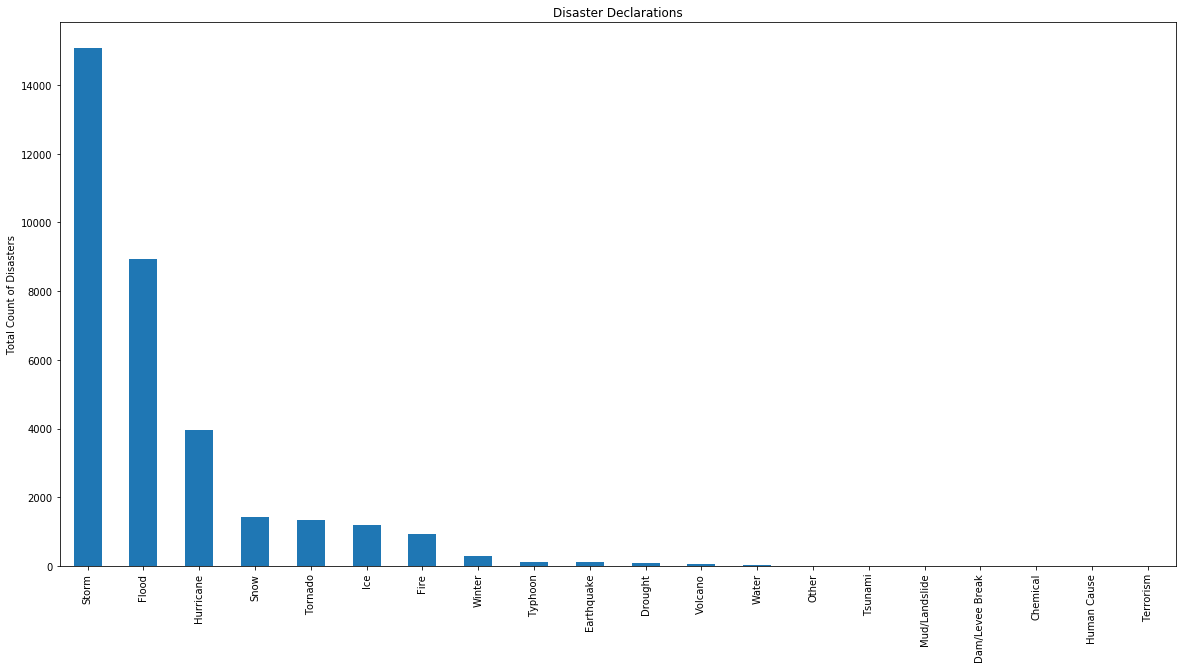

In [43]:
disaster_df.Disaster_Type.value_counts().plot(kind='bar', figsize=(20, 10))

plt.title('Disaster Declarations')
plt.ylabel('Total Count of Disasters')


Text(0, 0.5, 'Total Count of Emergencies')

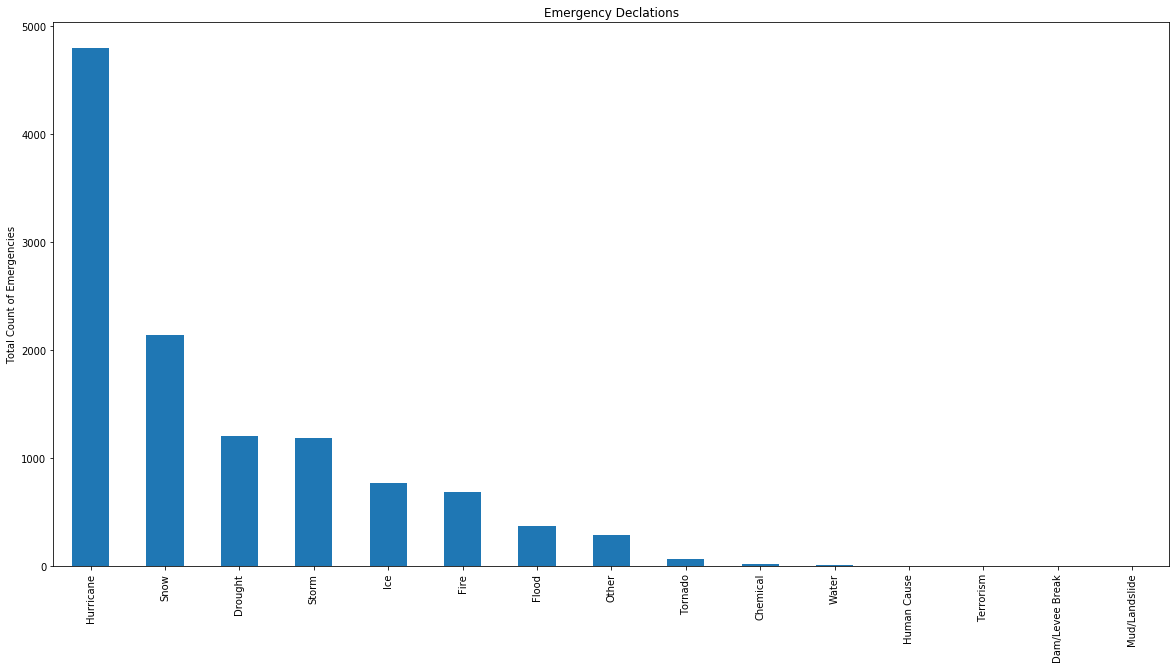

In [7]:
emergency_df.Disaster_Type.value_counts().plot(kind='bar',figsize=(20,10))

plt.title('Emergency Declations')
plt.ylabel('Total Count of Emergencies')

Text(0, 0.5, 'Total Count of Fires')

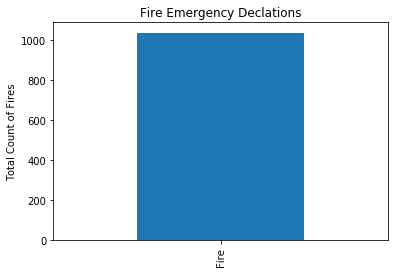

In [8]:
fire_df.Disaster_Type.value_counts().plot(kind='bar')

plt.title('Fire Emergency Declations')
plt.ylabel('Total Count of Fires')

This was interesting to look and see what are the different things that are included in Disaster, Emergency and Fire. And it seems like there are some overlaps. For example, Hurricane is under disaster and under emergency. So it storm etc. So it would be beneficial to understand what is the difference between disaster and emergency by their definition. 

Diasaster: The President can declare a major disaster for any natural event, including any hurricane, tornado, storm, high water, wind-driven water, tidal wave, tsunami, earthquake, volcanic eruption, landslide, mudslide, snowstorm, or drought, or, regardless of cause, fire, flood, or explosion, that the President determines has caused damage of such severity that it is beyond the combined capabilities of state and local governments to respond. A major disaster declaration provides a wide range of federal assistance programs for individuals and public infrastructure, including funds for both emergency and permanent work. 


Emergencies: The President can declare an emergency for any occasion or instance when the President determines federal assistance is needed.  Emergency declarations supplement State and local or Indian tribal government efforts in providing emergency services, such as the protection of lives, property, public health, and safety, or to lessen or avert the threat of a catastrophe in any part of the United States.  The total amount of assistance provided for in a single emergency may not exceed $5 million. 


#### 2) Question
* What are the different types of disasters that have been cateloged by FEMA?
    * What is the top 5 types of disasters caused since 1953
    * What is the least 5 types of disasters caused since 1953

Text(0, 0.5, 'Count')

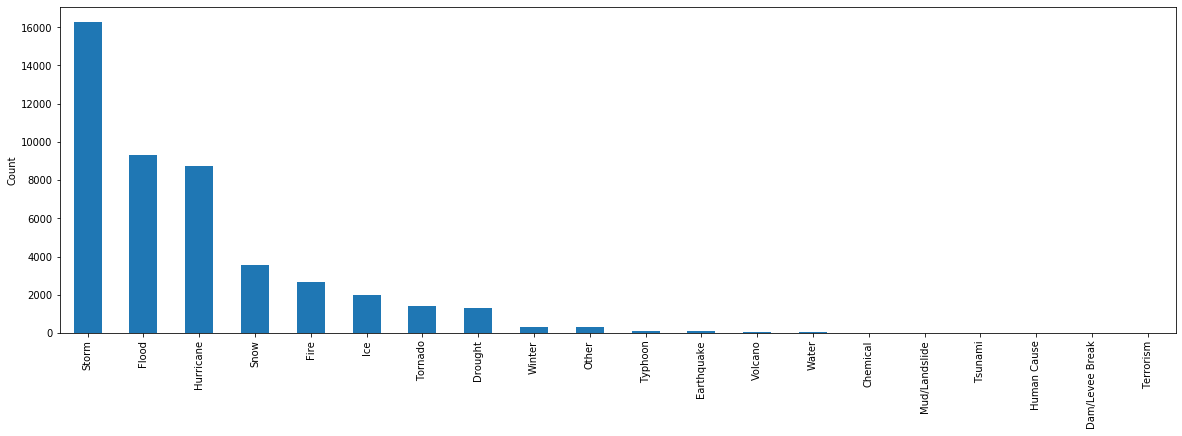

In [44]:
# This can be achieved by looking at the Disaster_Type column. This will give us
# all the disasters that took place in any categories

data.Disaster_Type.value_counts().plot(kind='bar', figsize=(20, 6))
plt.ylabel('Count')

Text(0, 0.5, 'Count')

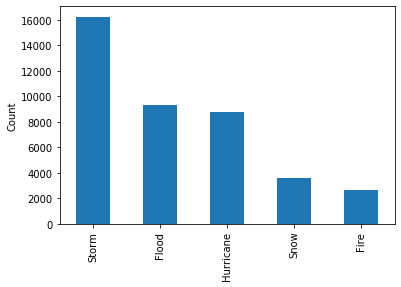

In [10]:
# what are the top 5 disasters that took place since 1953

data.Disaster_Type.value_counts().head(5).plot(kind='bar')
plt.ylabel('Count')

# looks like storm is the #1 disaster

Text(0, 0.5, 'Count')

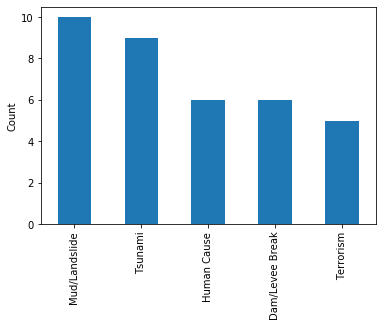

In [11]:
# What are the least 5 disasters that took place since 1953
data.Disaster_Type.value_counts().tail(5).plot(kind='bar')
plt.ylabel('Count')


#looks like Terrorism is at the bottom as a disaster

Looking at the charts, it seems like storm is the #1 disaster that FEMA attends to. Terrorism is the least. 

#### 3) Question
* Which state by far has the most disaster? Which state has the least?

Text(0, 0.5, 'Total Count of Disasters')

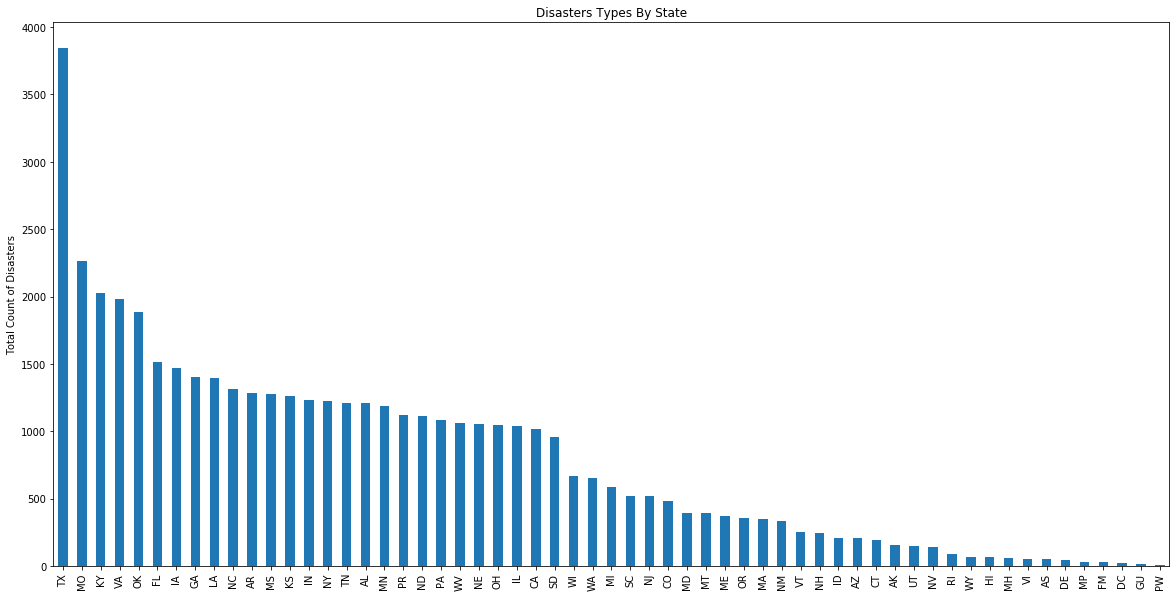

In [45]:
# To look at the disasters by states we look at the state column.

data.State.value_counts().plot(kind='bar', figsize=(20, 10))
plt.title('Disasters Types By State')
plt.ylabel('Total Count of Disasters')


Looks like TX has the highest amount of disaster. Would be interesting to know why that is.

What's also interesting is that we have more than 50 staes here. There are actually 59 bars. This is because this includes the us territories and possessions. I learned the abbreviation of the other us territories and possessions that are outside the 50 states but still within the US and FEMA can be provided to them as well. For example -

PW: Palau
FM: Federated States of Micronesia.
PR: Puerto Rico
AS: American Samoa
GU: Guam
MP: Northern Mariana Islands
VI: Virgin Islands (U.S)
MH: Marshall Islands
UM: U.S. Minor Outlying Islands 

Text(0, 0.5, 'Count')

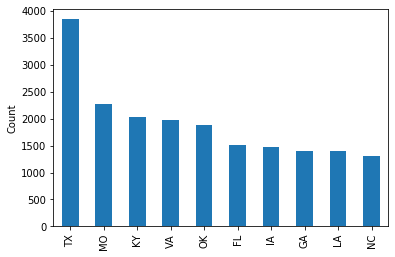

In [13]:
# What are the top 10 states with disasters
data.State.value_counts().head(10).plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

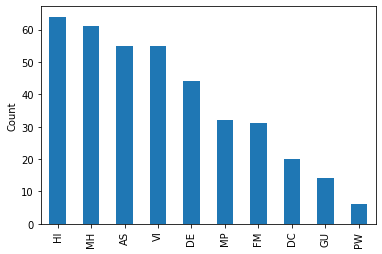

In [14]:
# What are the least 10 states with disasters
data.State.value_counts().tail(10).plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

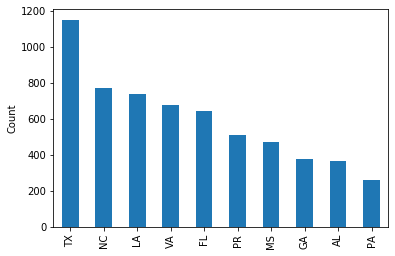

In [16]:
# top 10 states with hurricane as disaster - looks like TX is still the winner but NC is the 2nd one when it comes to
# Hurricane as the disaster
hurricane_df.State.value_counts().head(10).plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

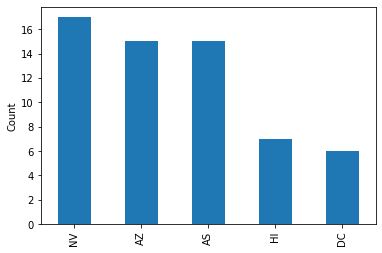

In [17]:
# the states getting least effected by Hurricane

hurricane_df.State.value_counts().tail(5).plot(kind='bar')
plt.ylabel('Count')

### 2 - Ask and answer analytic questions
* Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

1) What is the breakdown of disasters by state. For each state, what are the likely disasters that are prominent to that state? 

2) Which disasters or emergencies have lasted the longest? What are the states that were affected?

3) What is the trend of the FEMA disaster declaration through the years? Has it gone up? Gone down?

4) According to this dataset, Hurricane is the 3rd among the top disasters after Storm and flood. Storm themselves can have a chance to become hurricanes and flooding may occure from hurricanes. Considering the disterer type "Hurricane", how many named hurricane have we encountered since 1953.

5) what are the different hurricane titles we encountered since 1953

6) How does the distribution of the hurricanes look? 
    * what is the longest hurricane - how long does a hurricane usually last?
    * mean and std deviation

#### Question
1) What is the breakdown of disasters by state. For each state, what are the likely disasters that are prominent to that state? 

In [18]:
data.groupby(['State', 'Disaster_Type'])['Disaster_Title'].count()

State  Disaster_Type
AK     Earthquake        7
       Fire             16
       Flood            46
       Other             4
       Snow              4
                        ..
WY     Fire             17
       Flood            21
       Ice               2
       Storm            20
       Tornado           2
Name: Disaster_Title, Length: 405, dtype: int64

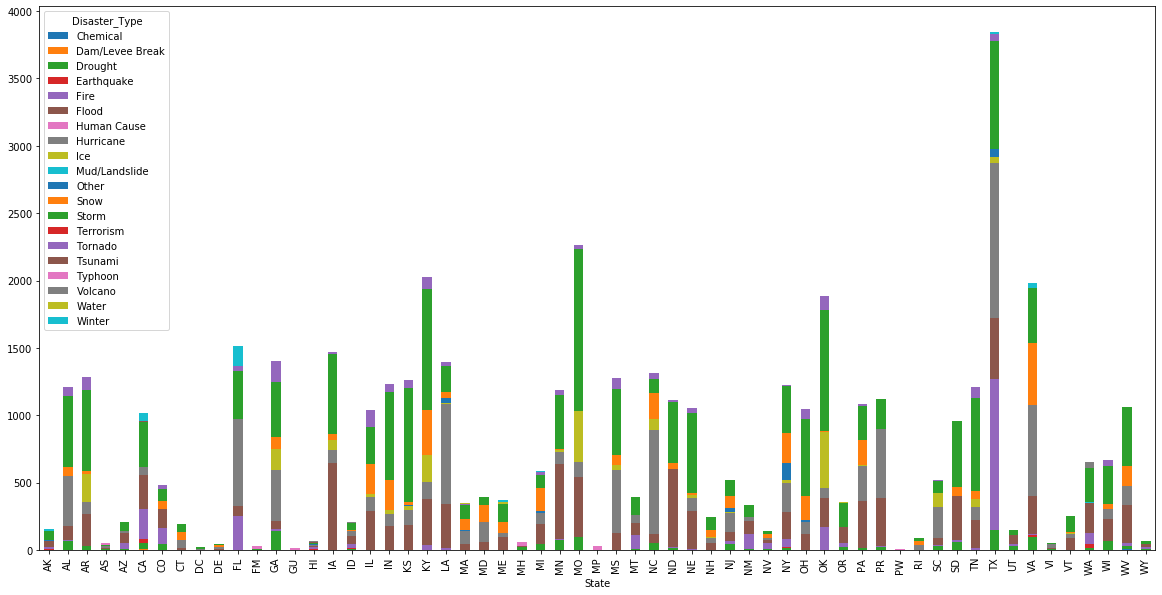

In [46]:
# Breakdown of disaster types by states...
data.groupby(['State', 'Disaster_Type']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(20, 10))

This graph provides a good idea of the breakdown of disaster by state. For example, we already know that TX has the highest amount of disasers but what are those disasters? So this shows a breakdown of that. 

Interesting observations - for example, Hurricanes are prominents on states such as FL, TX, NC, LA etc. whereas terrorist is more in CA, NY, VA etc.

#### Question
2) Which disasters or emergencies have lasted the longest? What are the states that were affected?

In [23]:
# Let’s take a look at the number of times FEMA has deployed resources by year
# this will be accomplished by using the column be Declaration_year
# so we need to extract the year first

data['Start_year'] = data['Start_Date'].dt.year
data['End_year'] = data['End_Date'].dt.year
data['Declaration_year'] = data['Declaration_Date'].dt.year
data['Dec_Close_year'] = data['Close_Date'].dt.year

data.head(5)

,Declaration_Number,Declaration_Type,Declaration_Date,State,County,Disaster_Type,Disaster_Title,Start_Date,End_Date,Close_Date,...,Individuals_Households_Program,Public_Assistance_Program,Hazard_Mitigation_Program,Start_End_duration,End_Close_duration,Declaration_Close_duration,Start_year,End_year,Declaration_year,Dec_Close_year
0,DR-1,Disaster,1953-05-02,GA,NaN,Tornado,Tornado,1953-05-02,1953-05-02,1954-06-01,...,No,Yes,Yes,1.0,396.0,396.0,1953,1953.0,1953,1954.0
1,DR-2,Disaster,1953-05-15,TX,NaN,Tornado,Tornado and Heavy Rainfall,1953-05-15,1953-05-15,1958-01-01,...,No,Yes,Yes,1.0,1693.0,1693.0,1953,1953.0,1953,1958.0
2,DR-3,Disaster,1953-05-29,LA,NaN,Flood,Flood,1953-05-29,1953-05-29,1960-02-01,...,No,Yes,Yes,1.0,2440.0,2440.0,1953,1953.0,1953,1960.0
3,DR-4,Disaster,1953-06-02,MI,NaN,Tornado,Tornado,1953-06-02,1953-06-02,1956-02-01,...,No,Yes,Yes,1.0,975.0,975.0,1953,1953.0,1953,1956.0
4,DR-5,Disaster,1953-06-06,MT,NaN,Flood,Floods,1953-06-06,1953-06-06,1955-12-01,...,No,Yes,Yes,1.0,909.0,909.0,1953,1953.0,1953,1955.0


Text(0, 0.5, 'Total Count of Declaration')

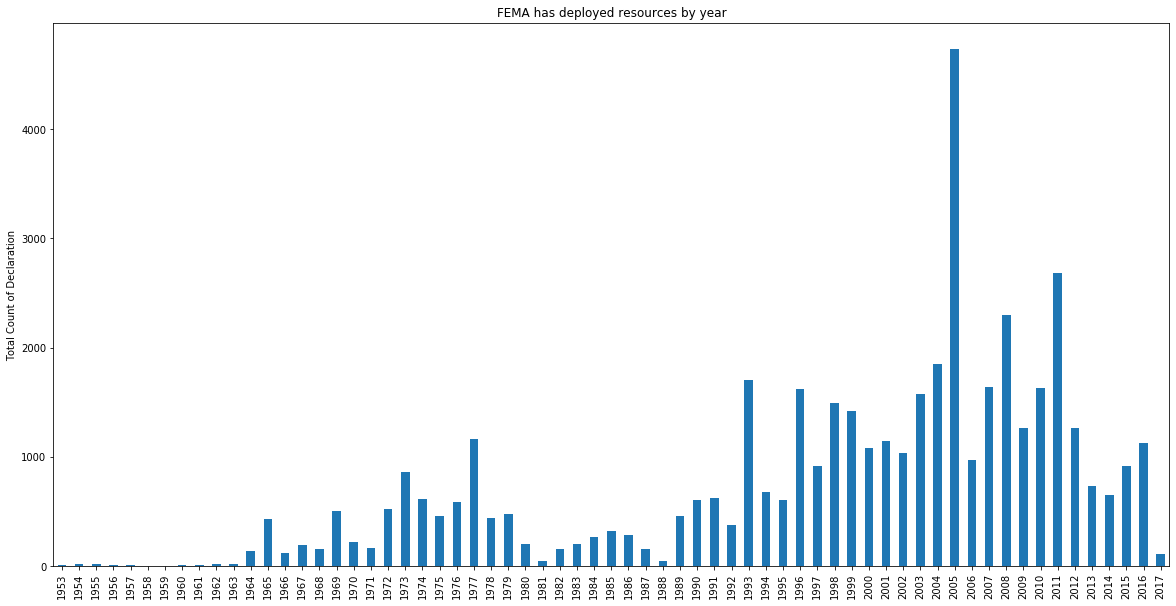

In [47]:
#data.Declaration_year.value_counts().sort_index()

data.Declaration_year.value_counts().sort_index().plot(
    kind='bar', figsize=(20, 10))
plt.title('FEMA has deployed resources by year')
plt.ylabel('Total Count of Declaration')

Looks like 2005 is the year where disaster relief was the most.

#### Question
3) What is the trend of the FEMA disaster declaration through the years? Has it gone up? Gone down?

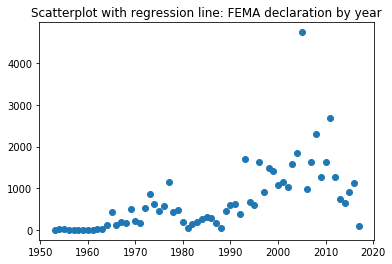

In [25]:
#use matplotlib - using a scatter plot 

fema_by_year = data.Declaration_year.value_counts().sort_index()
#fema_by_year.index
#fema_by_year.values

#fema_by_year

plt.scatter(x=fema_by_year.index, y=fema_by_year.values)
plt.title('Scatterplot with regression line: FEMA declaration by year')
plt.show()

It varies. Seems like between 1995 to 2012 or so there have been an spike on disasters and FEMA have been busy

#### Question
4) According to this dataset, Hurricane is the 3rd among the top disasters after Storm and flood. Storm themselves can have a chance to become hurricanes and flooding may occure from hurricanes. Considering the disterer type "Hurricane", how many disasters that are named "hurricane" have we encountered since 1953

In [30]:
# distribution of the hurricanes by plotting it on a histogram
# lets look at just the hurricane data 

data[data['Disaster_Type'] == 'Hurricane']


,Declaration_Number,Declaration_Type,Declaration_Date,State,County,Disaster_Type,Disaster_Title,Start_Date,End_Date,Close_Date,...,Individuals_Households_Program,Public_Assistance_Program,Hazard_Mitigation_Program,Start_End_duration,End_Close_duration,Declaration_Close_duration,Start_year,End_year,Declaration_year,Dec_Close_year
20,DR-22,Disaster,1954-09-02,MA,NaN,Hurricane,Hurricanes,1954-09-02,1954-09-02,1956-12-01,...,No,Yes,Yes,1.0,822.0,822.0,1954,1954.0,1954,1956.0
21,DR-23,Disaster,1954-09-02,RI,NaN,Hurricane,Hurricanes,1954-09-02,1954-09-02,1956-12-01,...,No,Yes,Yes,1.0,822.0,822.0,1954,1954.0,1954,1956.0
22,DR-24,Disaster,1954-09-13,ME,NaN,Hurricane,Hurricanes,1954-09-13,1954-09-13,1956-12-01,...,No,Yes,Yes,1.0,811.0,811.0,1954,1954.0,1954,1956.0
23,DR-25,Disaster,1954-09-17,CT,NaN,Hurricane,Hurricanes,1954-09-17,1954-09-17,1957-01-01,...,No,Yes,Yes,1.0,838.0,838.0,1954,1954.0,1954,1957.0
24,DR-26,Disaster,1954-10-07,NY,NaN,Hurricane,Hurricanes,1954-10-07,1954-10-07,1956-12-01,...,No,Yes,Yes,1.0,787.0,787.0,1954,1954.0,1954,1956.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46055,DR-4291,Disaster,2016-11-02,VA,Portsmouth,Hurricane,Hurricane Matthew,2016-10-07,2016-10-15,NaT,...,Yes,Yes,Yes,9.0,NaN,NaN,2016,2016.0,2016,NaN
46056,DR-4291,Disaster,2016-11-02,VA,Suffolk,Hurricane,Hurricane Matthew,2016-10-07,2016-10-15,NaT,...,Yes,Yes,Yes,9.0,NaN,NaN,2016,2016.0,2016,NaN
46057,DR-4291,Disaster,2016-11-02,VA,Virginia Beach,Hurricane,Hurricane Matthew,2016-10-07,2016-10-15,NaT,...,Yes,Yes,Yes,9.0,NaN,NaN,2016,2016.0,2016,NaN
46058,DR-4291,Disaster,2016-11-02,VA,Isle of Wight County,Hurricane,Hurricane Matthew,2016-10-07,2016-10-15,NaT,...,Yes,Yes,Yes,9.0,NaN,NaN,2016,2016.0,2016,NaN


Looks like 8764 out of the ~46K data is hurricane


#### Question
5) what are the different hurricane titles we encountered since 1953


In [34]:
hurricane_df = data[data['Disaster_Type'] == 'Hurricane']

#hurricane_df

Text(0, 0.5, 'Count')

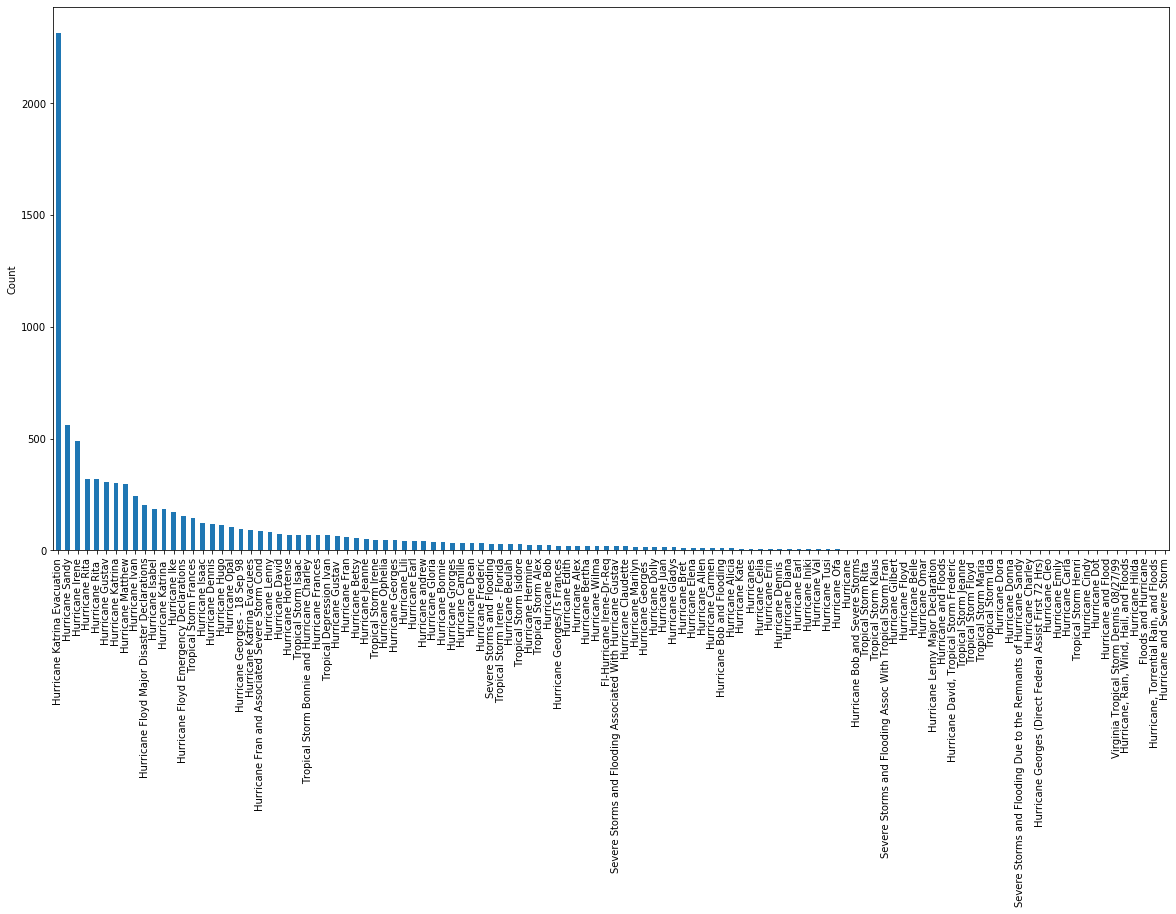

In [36]:
hurricane_df.Disaster_Title.value_counts().plot(kind='bar', figsize=(20, 10))
#hurricane_df.Disaster_Title.value_counts().head(20).plot(kind='bar', figsize=(20,10))
plt.ylabel('Count')

This data may have an issue. You can see from the results that the data may not be correct
The max number says hurricane Katrina evacuation - and a few later, there is hurrican katrina and then hurricane ktrina evacuee. So the naming is not correct. Same thing was see with Hurricane Bob and Irene.

#### Question

6) How does the distribution of the hurricanes look? 
    * what is the longest hurricane - how long does a hurricane usually last?
    * mean and std deviation

In [48]:
#Calculating the Average of Start to End | End to Close and Start To Close Date
data['Start_End_duration'] = (data['End_Date'] - data['Start_Date'])/np.timedelta64(1, 'D')

# adding a 1 because if the disaster closes on the same day then the subtraction
# gives us a 0 but it should really be 1
data['Start_End_duration'] = data['Start_End_duration'].add(1)

data['End_Close_duration'] = (data['Close_Date'] - data['End_Date'])/np.timedelta64(1, 'D')
data['End_Close_duration'] = data['End_Close_duration'].add(1)

data['Declaration_Close_duration'] = (data['Close_Date'] - data['Declaration_Date'])/np.timedelta64(1, 'D')
data['Declaration_Close_duration'] = data['Declaration_Close_duration'].add(1)

data.head(5)


,Declaration_Number,Declaration_Type,Declaration_Date,State,County,Disaster_Type,Disaster_Title,Start_Date,End_Date,Close_Date,...,Individuals_Households_Program,Public_Assistance_Program,Hazard_Mitigation_Program,Start_End_duration,End_Close_duration,Declaration_Close_duration,Start_year,End_year,Declaration_year,Dec_Close_year
0,DR-1,Disaster,1953-05-02,GA,NaN,Tornado,Tornado,1953-05-02,1953-05-02,1954-06-01,...,No,Yes,Yes,1.0,396.0,396.0,1953,1953.0,1953,1954.0
1,DR-2,Disaster,1953-05-15,TX,NaN,Tornado,Tornado and Heavy Rainfall,1953-05-15,1953-05-15,1958-01-01,...,No,Yes,Yes,1.0,1693.0,1693.0,1953,1953.0,1953,1958.0
2,DR-3,Disaster,1953-05-29,LA,NaN,Flood,Flood,1953-05-29,1953-05-29,1960-02-01,...,No,Yes,Yes,1.0,2440.0,2440.0,1953,1953.0,1953,1960.0
3,DR-4,Disaster,1953-06-02,MI,NaN,Tornado,Tornado,1953-06-02,1953-06-02,1956-02-01,...,No,Yes,Yes,1.0,975.0,975.0,1953,1953.0,1953,1956.0
4,DR-5,Disaster,1953-06-06,MT,NaN,Flood,Floods,1953-06-06,1953-06-06,1955-12-01,...,No,Yes,Yes,1.0,909.0,909.0,1953,1953.0,1953,1955.0


In [38]:
print(hurricane_df['Start_End_duration'].describe())

count    8764.000000
mean       22.594363
std        15.223689
min         1.000000
25%        10.000000
50%        21.000000
75%        34.000000
max        68.000000
Name: Start_End_duration, dtype: float64


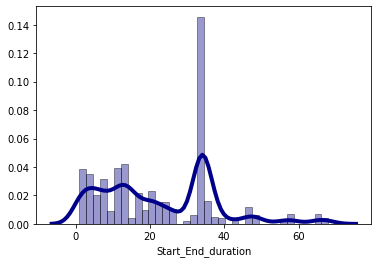

In [39]:
# plotting the data
sns.distplot(hurricane_df['Start_End_duration'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


It seems like the average number of days hurricane could last is 22 days. There are some outliers and we have seen this from 2005 data.

### Propose further research

Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.

* I believe that cleaning up the data would be a good idea. For example we should be able to write a program that just takes the Hurricane name and be able to plot the hurricanes. I have a sample of this here using removing white space, and replacing using regular expressions. But its a slow, manual process.


* It would be interesting to know what is the most likely disaster event that I should prepare for? If I were an insurance company, what diaster would I be looking at to predict my business? That will probably require creating models to see the trend of FEMA releif and predict the cost of the next disaster.

In [40]:
# cleaning up the data 

hurricane_title_df = hurricane_df

hurricane_title_df['Disaster_Title'] = hurricane_title_df['Disaster_Title'].str.strip()

hurricane_title_df['Disaster_Title'] = hurricane_title_df['Disaster_Title'].str.replace(r'Hurricane Katrina.*','Hurricane Katrina')
hurricane_title_df['Disaster_Title'] = hurricane_title_df['Disaster_Title'].str.replace(r'Hurricane Floyd.*','Hurricane Floyd')
hurricane_title_df['Disaster_Title'] = hurricane_title_df['Disaster_Title'].str.replace(r'Hurricane Bob.*','Hurricane Bob')


/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tparveen/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Text(0, 0.5, 'Count')

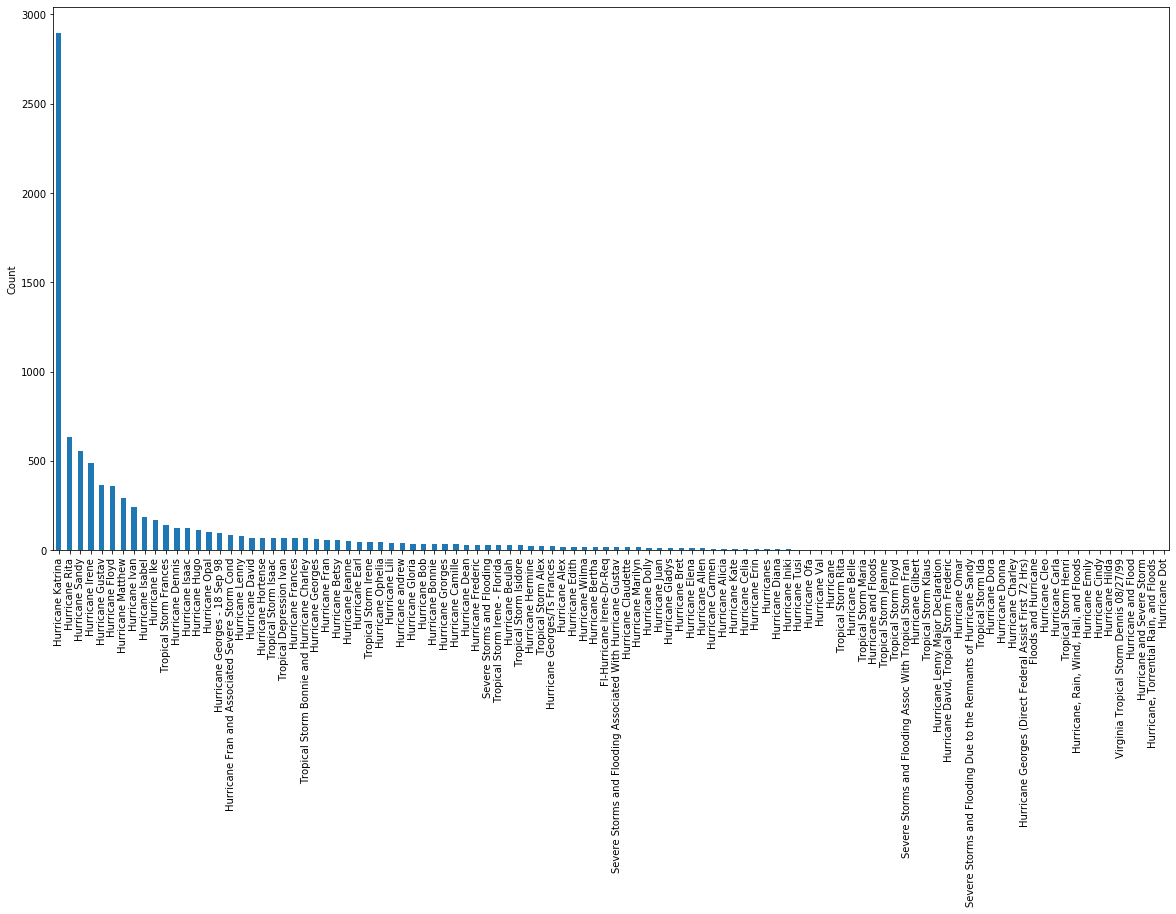

In [16]:
hurricane_df.Disaster_Title.value_counts().plot(kind='bar', figsize=(20,10))
plt.ylabel('Count')

Rubric for grading: https://docs.google.com/spreadsheets/d/18Z0aaE6mWIhUomdzfVZqYeAzw51-iEz_lGHIPwM-3ls/edit#gid=0

#### Extra Material not used

In [ ]:
# What are the top 10 states with the highest amount of disasters since 1954
# What are the top 5 disasters in those states
    
#state = data.groupby(['State','Disaster_Type'])['Disaster_Title'].count()
#state = newpd.groupby('State').count()[['Disaster_Type']]

#Make the graph bigger figure, size parameter -> figsize=(20,10)

#state = data.State.value_counts()
#state


In [ ]:
# all disaster title

# We could get the first 15.
#data.Disaster_Title.value_counts().head(15).plot(kind='bar', figsize=(20,10))
#data.Disaster_Title.value_counts().plot(kind='bar', figsize=(20,10))
#plt.title('Disasters By Title')
#plt.ylabel('Total Count of Disasters by Disaster Titles')

# So it looks like the disaster titles are repeated a lot. Should take a closer look at it.
# and this is where I find out that the disaster title column is not as clean as it should be

In [ ]:
# What are the top 5 disasters in those states

# breakdown of diasters for the top 5 states

# breakdown of diasters by states
#data.groupby(['State','Disaster_Type'])['Disaster_Title'].count()
#data.groupby('State').count()[['Disaster_Type']]

#data

In [ ]:


# Test to make sure that the format is change to dates
#data.info()

# lets look at the years of disasters 

#data['End_Date'] = pd.to_datetime(data['End_Date'])
#data['Start_Date'] = pd.to_datetime(data['Start_Date'])
#data['Declaration_Date'] = pd.to_datetime(data['Declaration_Date'])
#data['Close_Date'] = pd.to_datetime(data['Close_Date'])


In [ ]:
#fema_by_year = data.Declaration_year.value_counts().sort_index()
#fema_by_year.index
#fema_by_year.values

#fema_by_year

In [ ]:
#data[data['Disaster_Type'] == 'Storm']
# data[data['Disaster_Type'] == 'Hurricane'].shape 

#hurricane_df.Disaster_Title.value_counts().plot(kind='bar', figsize=(20,10))
#plt.ylabel('Count')


In [ ]:
#Get the days that the hurricane lasted - then find the mean, std dev



#hurricane_df.groupby(['State','Disaster_Title'])['Disaster_Title'].count()
#hurricane_df.info()
#print(hurricane_df)

# from difflib import SequenceMatcher
#def similar(a, b): return SequenceMatcher(None, a, b).ratio(

#print(hurricane_df['Start_End_duration'].describe())
#hurricane_df['Duration'].plot(kind='bar', figsize=(20,10))
#plt.ylabel('Count')


In [ ]:
# checking seaborn version sns.__version__
# upgrading seaborn versi
#plt.hist(hurricane_df['Start_End_duration'])
#plt.show()


In [ ]:
#df[''new_column] = [' '.join(item.split(' ')[0:2] for item in df['column']]
# comparing package in python

#hurricane_title_df.replace({'Disaster_Title':r'^Hurricanes Katrina. $'}, {'Disaster_Title':'Hurricane Katrina'}, regex=True)

#hurricane_title_df['hurricane_titles'] = [' '.join(item.split(' ')[0:2] for item in hurricane_title_df['Disaster_Title']]
#hurricane_title_df

#hurricane_title_df['Disaster_Title'] = hurricane_title_df['Disaster_Title'].str.replace(r'^Irene.*','Hurricane Irene')

#hurricane_title_df
#print(hurricane_df['Disaster_Title'] == 'Hurricane Katrina')

An example: https://medium.com/@jasoncrease/was-2016-especially-dangerous-for-celebrities-79d79b9fae02#.zd8hv5jge